# Prvi kolokvijum - popravni


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import lavirint
from lavirint import Lavirint
from lavirint import LavirintEditor
from lavirint import LavirintAnimacija

In [2]:
class Stanje:
    def __init__(self, prethodno, polje, x, y, cena=1):
        self.prethodno = prethodno
        self.polje = polje
        self.x = x
        self.y = y
        self.cena = cena
    
    def to_dict(self, rekurzivno=False):
        stanje = {
            "polje": self.polje,
            "x": self.x,
            "y": self.y,
            "prethodno": None,
            "cena": self.cena
        }
        if rekurzivno and self.prethodno is not None:
            stanje["prethodno"] = self.prethodno.to_dict(rekurzivno)
        elif self.prethodno is not None:
            stanje["prethodno"] = {"x": self.prethodno.x, "y": self.prethodno.y, "cena": self.prethodno.cena}
        return stanje
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __repr__(self):
        return "{} {} {} {} {}".format(self.x, self.y, self.polje["podloga"], self.polje["objekat"], self.cena)
    
    def __hash__(self):
        p1x = -1
        p1y = -1
        if self.prethodno is not None:
            p1x = self.prethodno.x
            p1y = self.prethodno.y
        return hash((self.x, self.y, p1x, p1y))


def cena(lavirint, x, y):
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1)

# 1.

In [3]:
neprohodne_podloge = {"blato"}
recnik_cena = {
    "lava": 50,
    "led": 10,
    "pod": 1
}

def cena(lavirint, x, y):
    return recnik_cena.get(lavirint.dobavi_polje(x, y)["podloga"], 1)

def sledeca_stanja(stanje, lavirint):
    nova_stanja = []
    p1x = -1
    p1y = -1
    if stanje.prethodno is not None:
        p1x = stanje.prethodno.x
        p1y = stanje.prethodno.y
    # desno i gore
    if stanje.x+1 < lavirint.sirina and stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x+1, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y-1), stanje.x+1, stanje.y-1, cena(lavirint, stanje.x+1, stanje.y-1)))
    # lev i gore
    if stanje.x-1 >= 0 and stanje.y-1 >= 0 and lavirint.dobavi_polje(stanje.x-1, stanje.y-1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y-1), stanje.x-1, stanje.y-1, cena(lavirint, stanje.x-1, stanje.y-1)))
    # desno dole
    if stanje.x+1 < lavirint.sirina and stanje.y+1 < lavirint.visina and lavirint.dobavi_polje(stanje.x+1, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y+1), stanje.x+1, stanje.y+1, cena(lavirint, stanje.x+1, stanje.y+1)))
    # levo dole
    if stanje.x-1 >=0 and stanje.y+1 and lavirint.dobavi_polje(stanje.x-1, stanje.y+1)["podloga"] not in neprohodne_podloge:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y+1), stanje.x-1, stanje.y+1, cena(lavirint, stanje.x-1, stanje.y+1)))
    
    return nova_stanja

In [4]:
def ucs(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


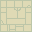
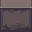
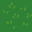
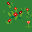
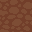
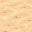
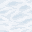
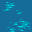
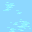
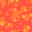
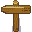
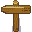
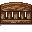
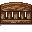
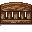
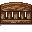
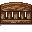
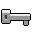
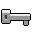
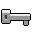
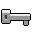
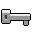
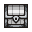
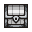
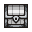
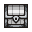
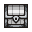
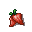
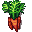

In [6]:
# formiramo pocetno stanje
lavirint = Lavirint("lavirint.json")

pocetno = random.choice(lavirint.dobavi_sa_objektom("pocetak"))
pocetno_stanje = Stanje(None, lavirint.dobavi_polje(*pocetno), *pocetno)

rezultat = ucs(lavirint, pocetno_stanje, "kovceg")
rezultat2 = ucs(lavirint, rezultat[0], "cilj")
rezultat = (rezultat2[0], rezultat[1] + rezultat2[1])

animacija = LavirintAnimacija("slike", "lavirint.json", rezultat)
animacija.prikazi()

# 2.


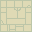
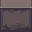
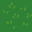
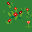
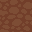
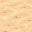
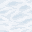
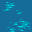
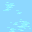
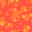
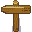
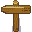
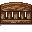
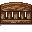
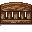
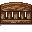
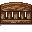
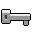
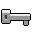
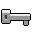
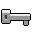
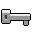
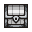
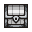
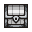
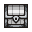
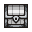
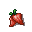
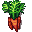

In [14]:
def sledeca_stanja2(stanje, lavirint):
    nova_stanja = []
    p1x = -1
    p1y = -1
    if stanje.prethodno is not None:
        p1x = stanje.prethodno.x
        p1y = stanje.prethodno.y
    # desno
    if stanje.x+1 < lavirint.sirina and (stanje.x+1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y), stanje.x+1, stanje.y, cena(lavirint, stanje.x+1, stanje.y)))
    # levo
    if stanje.x-1 >= 0 and (stanje.x-1 != p1x or stanje.y != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y), stanje.x-1, stanje.y, cena(lavirint, stanje.x-1, stanje.y)))
    # dole
    if stanje.y+1 < lavirint.visina and (stanje.x != p1x or stanje.y+1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y+1), stanje.x, stanje.y+1, cena(lavirint, stanje.x, stanje.y+1)))
    # gore
    if stanje.y-1 >= 0  and (stanje.x != p1x or stanje.y-1 != p1y):
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x, stanje.y-1), stanje.x, stanje.y-1, cena(lavirint, stanje.x, stanje.y-1)))
    
    #dodavanje novih stanja
    # desno i gore
    if stanje.x+1 < lavirint.sirina and stanje.y-1 >= 0:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y-1), stanje.x+1, stanje.y-1, cena(lavirint, stanje.x+1, stanje.y-1)))
    # lev i gore
    if stanje.x-1 >= 0 and stanje.y-1 >= 0:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y-1), stanje.x-1, stanje.y-1, cena(lavirint, stanje.x-1, stanje.y-1)))
    # desno dole
    if stanje.x+1 < lavirint.sirina and stanje.y+1 < lavirint.visina:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x+1, stanje.y+1), stanje.x+1, stanje.y+1, cena(lavirint, stanje.x+1, stanje.y+1)))
    # levo dole
    if stanje.x-1 >=0 and stanje.y+1:
        nova_stanja.append(Stanje(stanje, lavirint.dobavi_polje(stanje.x-1, stanje.y+1), stanje.x-1, stanje.y+1, cena(lavirint, stanje.x-1, stanje.y+1)))
    
    return nova_stanja

def ucs_kovcezi(lavirint, pocetno_stanje):
    pokupljeni_kljucevi = []
    spisak_ciljeva = {"kovceg_crveni": 1, "kovceg_plavi": 2}
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if spisak_ciljeva["kovceg_crveni"] != 0 or spisak_ciljeva["kovceg_plavi"] != 0:
            if trenutno.polje["objekat"] in spisak_ciljeva:
                if spisak_ciljeva[trenutno.polje["objekat"]] > 0:
                    neposecen = True
                    for pk in pokupljeni_kljucevi:
                        if pk.polje["objekat"] == trenutno.polje["objekat"] and pk.x == trenutno.x and pk.y == trenutno.y:
                            neposecen = False
                    if neposecen:
                        pokupljeni_kljucevi.append(trenutno)
                        spisak_ciljeva[trenutno.polje["objekat"]] -= 1
                        poseceni = set()
                        za_pretragu = []
        else:
             if trenutno.polje["objekat"] == "cilj":
                return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja2(trenutno, lavirint):
            stanje.cena += trenutno.cena
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

lavirint = Lavirint("lavirint1.json")

pronadjeni_kovcezi = ucs_kovcezi(lavirint, pocetno_stanje)
rezultat = ucs(lavirint, pronadjeni_kovcezi[0], "cilj")
rezultat2 = (rezultat[0], pronadjeni_kovcezi[1] + rezultat[1])
animacija = LavirintAnimacija("slike", "lavirint1.json", rezultat)
animacija.prikazi()

# 3.


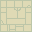
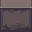
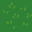
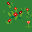
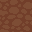
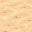
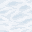
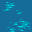
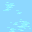
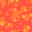
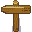
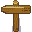
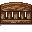
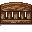
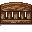
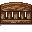
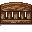
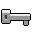
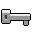
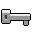
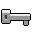
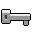
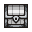
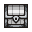
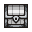
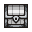
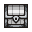
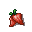
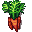

In [15]:
def h(stanje, lavirint):
    ciljevi = lavirint.dobavi_sa_objektom("cilj")
    udaljenosti = []
    lava = lavirint.dobavi_sa_podlogom("lava")
    #lava = lavirint.dobavi_sa_podlogom("lava")
    udaljenosti = []
    for l in lava:
        l_x = l[0]*l[0]
        l_y = l_x + 1
        udaljenosti.append(np.sqrt((l_x-stanje.x)**2 + (l_y - stanje.y)**2)//2)
    
    return max(udaljenosti)

def ucs_navodi(lavirint, pocetno_stanje, cilj):
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if trenutno.polje["objekat"] == cilj:
            return (trenutno, poseceni_lista)
        for stanje in sledeca_stanja2(trenutno, lavirint):
            stanje.cena += trenutno.cena + h(trenutno, lavirint)
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)


def a_zvezda(lavirint, pocetno_stanje, cilj):
    pokupljeni_kovcezi = []
    spisak_ciljeva = {"kovceg_crveni": 2, "kovceg_plavi": 1}
    
    za_pretragu = [pocetno_stanje]
    poseceni = set()
    poseceni_lista = list()
    while len(za_pretragu) > 0:
        za_pretragu = sorted(za_pretragu, key=lambda x: x.cena)
        trenutno = za_pretragu.pop(0)
        poseceni.add(trenutno)
        poseceni_lista.append(trenutno)
        if spisak_ciljeva["kovceg_crveni"] != 0 or spisak_ciljeva["kovceg_plavi"] != 0:
            if trenutno.polje["objekat"] in spisak_ciljeva:
                if spisak_ciljeva[trenutno.polje["objekat"]] > 0:
                    neposecen = True
                    for pk in pokupljeni_kovcezi:
                        if pk.polje["objekat"] == trenutno.polje["objekat"] and pk.x == trenutno.x and pk.y == trenutno.y:
                            neposecen = False
                    if neposecen:
                        pokupljeni_kovcezi.append(trenutno)
                        spisak_ciljeva[trenutno.polje["objekat"]] -= 1
                        poseceni = set()
                        za_pretragu = []
        else:
            
                    #if spisak_ciljeva["kovceg_crveni"] == 0 and spisak_ciljeva["kovceg_plavi"] == 0 and spisak_ciljeva["kovceg"] == 0:
            return ucs_navodi(lavirint, pocetno_stanje, cilj)
        for stanje in sledeca_stanja2(trenutno, lavirint):
            stanje.cena += trenutno.cena + h(trenutno, lavirint)
            if stanje not in poseceni and stanje not in za_pretragu:
                za_pretragu.append(stanje)
    return (None, poseceni_lista)

rezultat = a_zvezda(lavirint, pocetno_stanje, "cilj")
animacija = LavirintAnimacija("slike", "lavirint1.json", rezultat)
animacija.prikazi()
